In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # For NLP
import re # For Regex 
import string # For punctuation
import warnings # For warnings
  
warnings.filterwarnings(action = 'ignore')


In [9]:
train_data=pd.read_csv("twitter dataset.csv")

In [10]:
train_data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [11]:
type(train_data)

pandas.core.frame.DataFrame

In [12]:
train_data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [41]:
train_data.index


RangeIndex(start=0, stop=99989, step=1)

In [14]:
train_data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [16]:
train_data.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [17]:
train_data.describe(include=['object'])

,SentimentText
count,99989
unique,99989
top,"@Brygida_Poland thanks, haven't run for a week..."
freq,1


In [43]:
train_data['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [21]:
d = train_data['Sentiment'].value_counts(normalize = True) * 100 

In [23]:
d

1    56.463211
0    43.536789
Name: Sentiment, dtype: float64

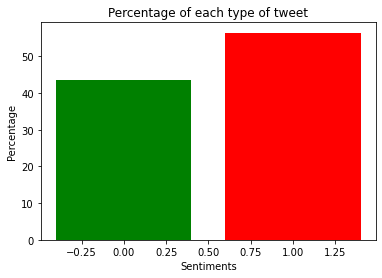

In [27]:
plt.bar(x = d.index, height = d.values, label = d.index, color= ['red','green'])
plt.xlabel("Sentiments")
plt.ylabel("Percentage")
plt.title("Percentage of each type of tweet")
plt.show()
pd.option_context('display.max_colwidth', 1000)

In [44]:
from string import punctuation 


In [48]:
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def replace_emojis(t):
  '''
  This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
  '''
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  
  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

  words = t.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t
def replace_smileys(t):
  '''
  This function replaces happy smileys with "happy" and sad smileys with "sad.
  '''
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

  words = t.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t
def replace_contractions(t):
  '''
  This function replaces english lanuage contractions like "shouldn't" with "should not"
  '''
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
  words = t.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

def remove_single_letter_words(t):
  '''
  This function removes words that are single characters
  '''
  words = t.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

print("Cleaning the tweets from the data.\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

def dataclean(t):
  '''
  This function cleans the tweets.
  '''
  t = replace_smileys(t) # replace handwritten emojis with their feeling associated
  t = t.lower() # convert to lowercase
  t = replace_contractions(t) # replace short forms used in english  with their actual words
  t = replace_emojis(t) # replace unicode emojis with their feeling associated
  t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
  t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
  t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
  t = re.sub('#', '', t) # remove '#'
  t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
  t = re.sub('@[^\s]+', '', t) # remove usernames
  t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
  t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
  t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
  t = t.replace('\\\\', '')
  t = t.replace('\\', '')
  t = remove_single_letter_words(t) # removes single letter words
  
  return t

train_data['SentimentText'] = train_data['SentimentText'].apply(dataclean)
print("Tweets have been cleaned.")

Cleaning the tweets from the data.

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove 'RT'. 
Replace all URLs and Links with word 'URL'.
Remove all punctuations.
Removes single letter words.

Tweets have been cleaned.


In [60]:
def freq_words(tokens):
  '''See frequency distribution of words'''
  from nltk.probability import FreqDist
  
  fdist = FreqDist(tokens)
  print(fdist) # total 508935 values and 56653 unique values
    
  # top 20 most common words
  print("Top 10 most common words in the data. \n")
  df = pd.DataFrame(fdist.most_common(20), columns=['Tokens', 'Frequency'])
  print(df)

  # plot of top 20 most common words
  fdist.plot(20, cumulative = False)
  plt.show()

def word_cloud(tokens):
  '''A word cloud (also known as text clouds or tag clouds) is a visualization, 
  the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
  '''
  from wordcloud import WordCloud
  w = ' '.join([i for i in tokens])
  wc = WordCloud(width = 1000, height = 700, random_state=21, max_font_size=110).generate(w)
  plt.imshow(wc, interpolation = "bilinear")
  plt.axis('off')
  plt.show()
def preprocess(t):
  # downloading necessary packages
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
   
  from nltk.stem.wordnet import WordNetLemmatizer
  lem = WordNetLemmatizer()
  
  # tokenization
  tw = []  
  tw = word_tokenize(t)  
  
  # remove the stopwords
  fs = [] # filtered list after removing stop words
  fs = ([i for i in tw if i not in stop_words])
  
  # lemmatization  
  ns = []
  for i in fs:
    ns.append(lem.lemmatize(i, 'v'))
  ns = ' '.join(ns)
  return ns  
print("Pre - processing the tweets.\n")
print("Downloading necessary packages for preprocessing.")
## for tokenization
if (nltk.download("punkt")):
  print("\"punkt\" is downloaded.")
## for stopwords
if (nltk.download('stopwords')):
  print("\"Stopwords\" are downloaded.")
## for lemmatization
if (nltk.download('wordnet')):
  print("Algorithm for lemmatization is downloaded.")  
print("-" * 50)
print("\nSteps involved are : ")
print("\nStep 1 - \"Tokenization\". ")
print("Importing the necessary functions required for tokenization.")

print("Necessary functions are downloaded.")
print("\nStep 2 - \"Removing the stopwprds\". ")
print("Importing the necessary functions required for removing stopwords.")
print("Necessary functions are downloaded.")
print("Stop words in ENGLISH language are : ")

print("\nStep 3 - \"Lemmatization\". ")
print("Importing the necessary functions required for lemmatization.")
print("Necessary functions are downloaded.")
print("Loading the algorithm for Lemmatization.")
print("Algorithm for lemmatization is loaded.\n")
pp_list = []
for tweet in train_data['SentimentText']:
  pp_list.append(preprocess(tweet))
print("After preprocessing.", pp_list[:5])

# for graphical display of preprocessed data
from nltk.tokenize import word_tokenize
tokens = []
for i in pp_list:
  tokens.extend(word_tokenize(i))
print("Top 20 words used in the tweets are : \n", tokens[:20])


Pre - processing the tweets.

"punkt" is downloaded.
"Stopwords" are downloaded.
Algorithm for lemmatization is downloaded.
--------------------------------------------------

Steps involved are : 

Step 1 - "Tokenization". 
Importing the necessary functions required for tokenization.
Necessary functions are downloaded.

Step 2 - "Removing the stopwprds". 
Importing the necessary functions required for removing stopwords.
Necessary functions are downloaded.
Stop words in ENGLISH language are : 

Step 3 - "Lemmatization". 
Importing the necessary functions required for lemmatization.
Necessary functions are downloaded.
Loading the algorithm for Lemmatization.
Algorithm for lemmatization is loaded.



[nltk_data] Downloading package punkt to C:\Users\SOBIYA
[nltk_data]     SELSIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SOBIYA
[nltk_data]     SELSIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SOBIYA
[nltk_data]     SELSIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


After preprocessing. ['sad apl friend', 'miss new moon trailer', 'omg already', 'omgaga im sooo im gunna cry dentist since suposed get crown put mins', 'think mi bf cheat tt']
Top 20 words used in the tweets are : 
 ['sad', 'apl', 'friend', 'miss', 'new', 'moon', 'trailer', 'omg', 'already', 'omgaga', 'im', 'sooo', 'im', 'gunna', 'cry', 'dentist', 'since', 'suposed', 'get', 'crown']


In [54]:
from sklearn.model_selection import train_test_split  
x = pp_list
y = train_data['Sentiment'].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 1)
print("Number of data points in training data :\n")
print("X = ", len(x_train))
print("Y = ", len(y_train))

print("\nNumber of data points in validation data :\n")
print("X = ", len(x_val))
print("Y = ", len(y_val))

Number of data points in training data :

X =  79991
Y =  79991

Number of data points in validation data :

X =  19998
Y =  19998


In [55]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [56]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)

val_vectors = vectorizer.transform(x_val)
print("Shape of training data : ",train_vectors.shape, "\nShape of validation data : ",val_vectors.shape)

Shape of training data :  (79991, 52246) 
Shape of validation data :  (19998, 52246)


In [57]:
print("Building a Logistic Regression Model using tf- idf approach")
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(solver='lbfgs')
model_LR.fit(train_vectors, y_train)
print("\n\nOur Sentiment Analyzer from Logistic Regression is ready and trained.")

Building a Logistic Regression Model using tf- idf approach


Our Sentiment Analyzer from Logistic Regression is ready and trained.


Let us test the performance of our model on the validation set to predict the sentiment labels using the different ML models trained.
PERFORMANCE OF LOGISTIC REGRESSION MODEL : 

Predicting the sentiments...

Analysis after prediction : 

1    61.841184
0    38.158816
Name: predicted, dtype: float64


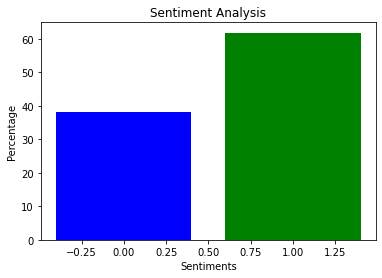

Confusion Matrix :
 [[5667 3043]
 [1964 9324]]
classification report: 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      8710
           1       0.75      0.83      0.79     11288

    accuracy                           0.75     19998
   macro avg       0.75      0.74      0.74     19998
weighted avg       0.75      0.75      0.75     19998

Accuracy score  =  74.96249624962496
----------------------------------------------------------------------------------------------------


In [58]:
def performance(model, y_true, vectors):
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  print("Predicting the sentiments...")
  y_pred = model.predict(vectors)   #y_pred_RF = model_RF.predict(val_vectors)
  df = pd.DataFrame({'actual' : y_true, 'predicted' : y_pred})
  print("\nAnalysis after prediction : \n")
  d = df['predicted'].value_counts(normalize = True) * 100 # series
  print(d)
  ## plot for analysis
  plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','red'])
  plt.xlabel("Sentiments")
  plt.ylabel("Percentage")
  plt.title('Sentiment Analysis')
  plt.show()
  
  cm = confusion_matrix(y_true,y_pred)
  crp = classification_report(y_true,y_pred)
  acc = accuracy_score(y_true,y_pred)
  return (cm, crp, acc)
print("Let us test the performance of our model on the validation set to predict the sentiment labels using the different ML models trained.")
print("PERFORMANCE OF LOGISTIC REGRESSION MODEL : \n")
perform = performance(model_LR, y_val, val_vectors)
print("Confusion Matrix :\n", perform[0])  
print("classification report: \n", perform[1])  
print("Accuracy score  = ", perform[2] *100)
print("-" * 100)
